In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
G = nx.read_gml('polblogs.gml')
len(G.nodes), len(G.edges)

(1490, 19090)

In [3]:
# remove duplicate edges
G = nx.DiGraph(G)
len(G.nodes), len(G.edges)

(1490, 19025)

In [4]:
# read in file to obtain the political party corresponding to each node
arr = []
file = open('polblogs.gml', 'r')
for line in file.readlines():
    if ' label ' in line:
        first = line.find('\"')
        second = line[first+1:].find('\"')
        arr.append(['label',line[first+1:first+1+second]])
    if ' value ' in line:
        arr.append(line.split())
file.close()
# create {url: {'party': 0 or 1}} dictionary
values = {arr[i][1]: {'party': int(arr[i+1][1])} for i in range(0,len(arr),2)}
# assign party attributes to nodes
nx.set_node_attributes(G, values)
# test if party attribute was properly assigned, should output 1
G.nodes['georgewbush.com']['party']

1

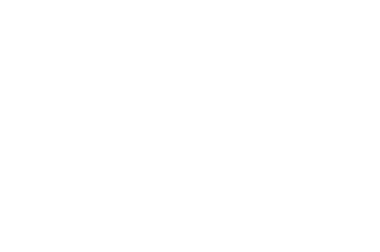

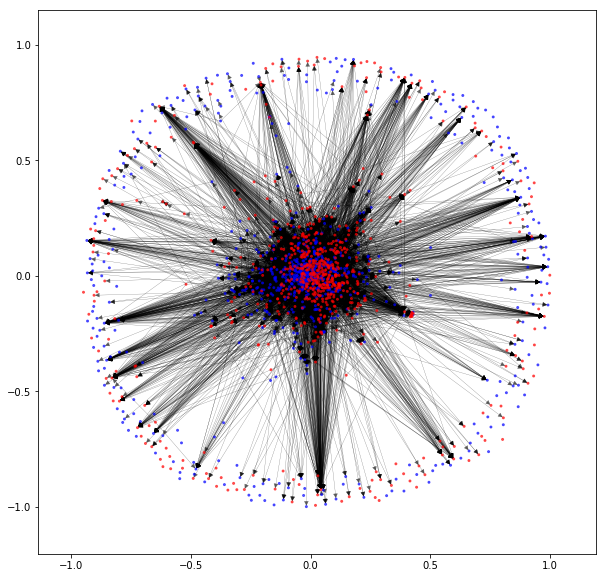

In [14]:
limits = plt.axis('off')
color_map = ['blue' if G.nodes[node]['party'] == 0 else 'red' for node in G]
plt.figure(figsize=(10,10))
nx.drawing.nx_pylab.draw_networkx(G, with_labels=False, node_size = 4, alpha = 0.6, width = 0.25, node_color = color_map)

In [6]:
def compute_page_rank(num_iterations):
    # initialize links
    links = defaultdict(set)
    for node1, node2 in G.edges:
        links[node1].add(node2)
    # initialize ranks
    ranks = {node: 1.0 for node in G.nodes}
    # in each iteration, calculate new page ranks based on neighbors' contributions
    for n in range(num_iterations):
        contributions = defaultdict(int)
        for node, neighbors in links.items():
            node_rank = ranks[node]
            rank_split = node_rank / len(neighbors)
            for neighbor in neighbors:
                contributions[neighbor] += rank_split
        for node in ranks:
            contribution = contributions[node] if node in contributions else 0
            # ranks[node] = contribution ## no teleportation
            ranks[node] = contribution*.85 + .15 ## teleportation with alpha = 0.85
    return ranks

In [7]:
ranks = compute_page_rank(500)
sorted(ranks.items(), key = lambda kv: kv[1], reverse=True)

[('dailykos.com', 14.33718485496818),
 ('atrios.blogspot.com', 12.167660297252898),
 ('instapundit.com', 10.086970050860327),
 ('blogsforbush.com', 9.980468040553976),
 ('talkingpointsmemo.com', 9.934865558301638),
 ('michellemalkin.com', 8.716845225004777),
 ('drudgereport.com', 8.558221223284004),
 ('washingtonmonthly.com', 8.42607489465332),
 ('powerlineblog.com', 7.13878489027333),
 ('andrewsullivan.com', 6.881917910457165),
 ('juancole.com', 6.805290788254981),
 ('littlegreenfootballs.com/weblog', 6.774192158506723),
 ('vodkapundit.com', 5.730930798806991),
 ('rightwingnews.com', 5.592846191246821),
 ('volokh.com', 5.4551559267140375),
 ('nationalreview.com/thecorner', 5.399424319294928),
 ('hughhewitt.com', 5.350957154935906),
 ('truthlaidbear.com', 5.148892725652862),
 ('prospect.org/weblog', 4.976961331856937),
 ('freerepublic.com', 4.815549672485047),
 ('digbysblog.blogspot.com', 4.448340314563505),
 ('talkleft.com', 4.3988792906555165),
 ('yglesias.typepad.com/matthew', 4.295

In [8]:
# user_partisanship is a measure of how conservative a user is on a 0-1 scale (liberal == 0, conservative == 1)
def compute_personalized_page_rank(num_iterations, user_partisanship):
    # initialize links
    links = defaultdict(set)
    for node1, node2 in G.edges:
        links[node1].add(node2)
    # initialize ranks
    ranks = {node: 1.0 for node in G.nodes}
    # intialize personal preferences
    # At C=2 and user_partisanship = 0.5, ranks are equal to standard PageRank
    C = 2 # value impacts scale of PageRank values but not the rankings within the set.
    E = {node: (1-user_partisanship)*C if G.nodes[node]['party'] == 0 else user_partisanship*C for node in G.nodes}
    # for num_iterations iterations, calculate new page ranks based on neighbors' contributions
    for n in range(num_iterations):
        contributions = defaultdict(int)
        for node, neighbors in links.items():
            node_rank = ranks[node]
            rank_split = node_rank / len(neighbors)
            for neighbor in neighbors:
                contributions[neighbor] += rank_split
        for node in ranks:
            contribution = contributions[node] if node in contributions else 0
            # ranks[node] = contribution ## no teleportation
            ranks[node] = contribution*.85 + .15*E[node] ## teleportation with alpha = 0.85
    return ranks

In [9]:
num_iterations = 500
user_partisanship = 0.5
ranks = compute_personalized_page_rank(num_iterations, user_partisanship)
sorted(ranks.items(), key = lambda kv: kv[1], reverse=True)

[('dailykos.com', 14.33718485496818),
 ('atrios.blogspot.com', 12.167660297252898),
 ('instapundit.com', 10.086970050860327),
 ('blogsforbush.com', 9.980468040553976),
 ('talkingpointsmemo.com', 9.934865558301638),
 ('michellemalkin.com', 8.716845225004777),
 ('drudgereport.com', 8.558221223284004),
 ('washingtonmonthly.com', 8.42607489465332),
 ('powerlineblog.com', 7.13878489027333),
 ('andrewsullivan.com', 6.881917910457165),
 ('juancole.com', 6.805290788254981),
 ('littlegreenfootballs.com/weblog', 6.774192158506723),
 ('vodkapundit.com', 5.730930798806991),
 ('rightwingnews.com', 5.592846191246821),
 ('volokh.com', 5.4551559267140375),
 ('nationalreview.com/thecorner', 5.399424319294928),
 ('hughhewitt.com', 5.350957154935906),
 ('truthlaidbear.com', 5.148892725652862),
 ('prospect.org/weblog', 4.976961331856937),
 ('freerepublic.com', 4.815549672485047),
 ('digbysblog.blogspot.com', 4.448340314563505),
 ('talkleft.com', 4.3988792906555165),
 ('yglesias.typepad.com/matthew', 4.295

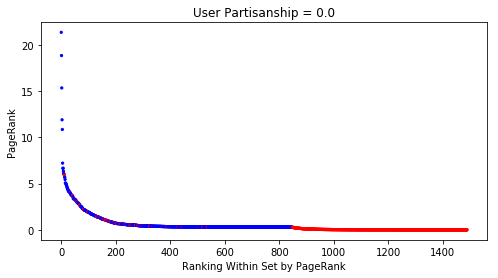

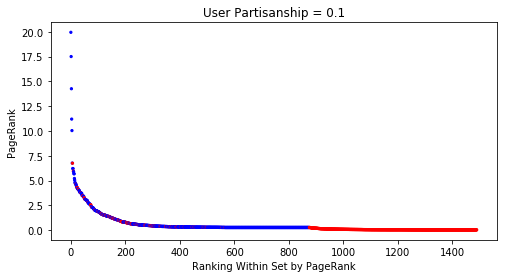

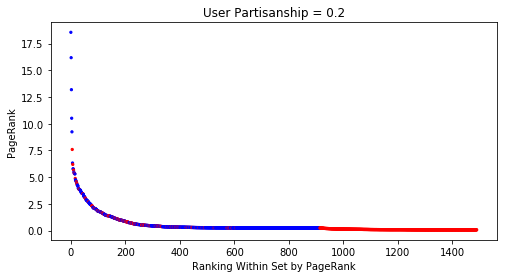

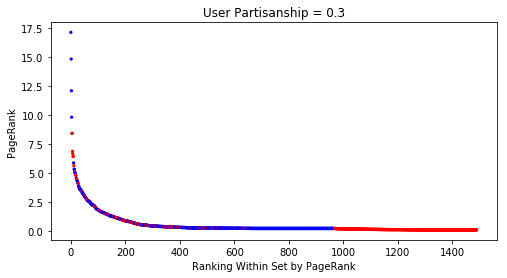

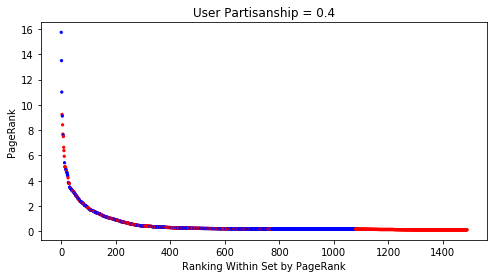

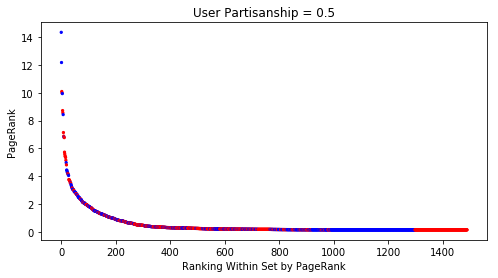

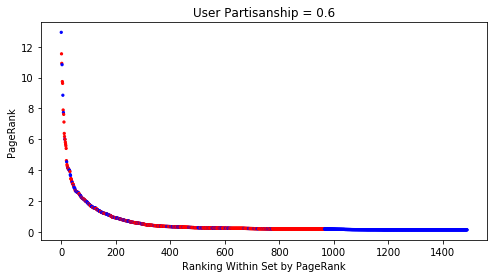

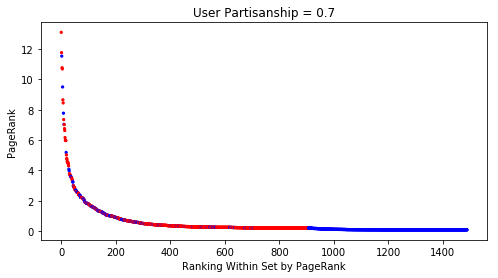

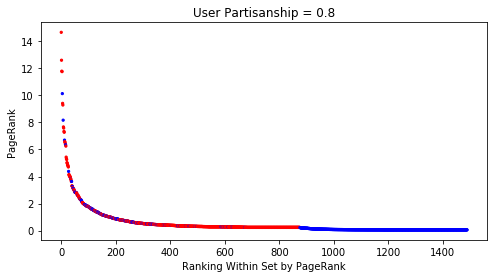

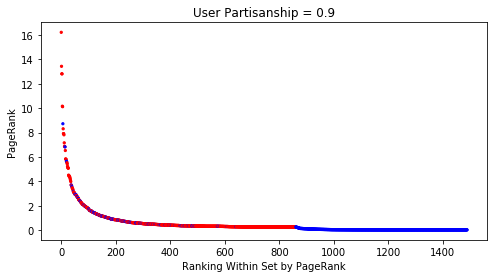

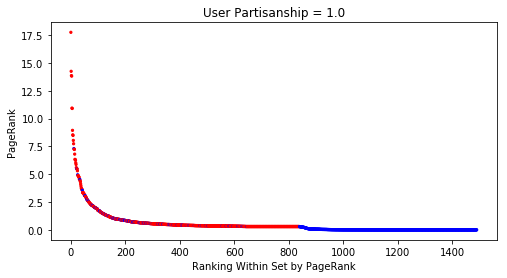

In [10]:
num_iterations = 100
for user_partisanship in (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    ranks = compute_personalized_page_rank(num_iterations, user_partisanship)
    sorted_ranks = sorted(ranks.items(), key = lambda kv: kv[1], reverse=True)
    color_map = ['blue' if G.nodes[node]['party'] == 0 else 'red' for node, _ in sorted_ranks]
    x, y = zip(*sorted_ranks) # unpack a list of pairs into two tuples
    plt.figure(figsize=(8,4))
    plt.scatter(range(len(y)), y, s=5, color=color_map)
    plt.title("User Partisanship = " + str(user_partisanship))
    plt.ylabel("PageRank")
    plt.xlabel("Ranking Within Set by PageRank")
    plt.show()

In [11]:
num_iterations = 100
for user_partisanship in (0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0):
    ranks = compute_personalized_page_rank(num_iterations, user_partisanship)
    sorted_ranks = sorted(ranks.items(), key = lambda kv: kv[1], reverse=True)[:10]
    df = pd.DataFrame(columns=['Node', 'Rank', 'Party'])
    for i, rank_tup in enumerate(sorted_ranks):
        node, rank = rank_tup
        party = 'Liberal' if G.nodes[node]['party'] == 0 else 'Conservative'
        df.loc[i+1] = [node, rank, party]
    display(df)

,Node,Rank,Party
1,dailykos.com,21.362266,Liberal
2,atrios.blogspot.com,18.846437,Liberal
3,talkingpointsmemo.com,15.346638,Liberal
4,washingtonmonthly.com,11.899509,Liberal
5,juancole.com,10.852684,Liberal
6,prospect.org/weblog,7.215798,Liberal
7,digbysblog.blogspot.com,6.662642,Liberal
8,talkleft.com,6.657752,Liberal
9,politicalwire.com,6.340996,Liberal
10,j-bradford-delong.net/movable_type,6.117327,Liberal


,Node,Rank,Party
1,dailykos.com,19.957250,Liberal
2,atrios.blogspot.com,17.510682,Liberal
3,talkingpointsmemo.com,14.264284,Liberal
4,washingtonmonthly.com,11.204822,Liberal
5,juancole.com,10.043206,Liberal
6,prospect.org/weblog,6.768031,Liberal
7,instapundit.com,6.751425,Conservative
8,digbysblog.blogspot.com,6.219782,Liberal
9,talkleft.com,6.205977,Liberal
10,andrewsullivan.com,5.952705,Conservative


,Node,Rank,Party
1,dailykos.com,18.552234,Liberal
2,atrios.blogspot.com,16.174926,Liberal
3,talkingpointsmemo.com,13.181929,Liberal
4,washingtonmonthly.com,10.510135,Liberal
5,juancole.com,9.233727,Liberal
6,instapundit.com,7.585311,Conservative
7,prospect.org/weblog,6.320263,Liberal
8,andrewsullivan.com,6.185008,Conservative
9,digbysblog.blogspot.com,5.776921,Liberal
10,talkleft.com,5.754203,Liberal


,Node,Rank,Party
1,dailykos.com,17.147217,Liberal
2,atrios.blogspot.com,14.839171,Liberal
3,talkingpointsmemo.com,12.099575,Liberal
4,washingtonmonthly.com,9.815449,Liberal
5,juancole.com,8.424248,Liberal
6,instapundit.com,8.419198,Conservative
7,blogsforbush.com,6.867856,Conservative
8,michellemalkin.com,6.673977,Conservative
9,drudgereport.com,6.433792,Conservative
10,andrewsullivan.com,6.417311,Conservative


,Node,Rank,Party
1,dailykos.com,15.742201,Liberal
2,atrios.blogspot.com,13.503416,Liberal
3,talkingpointsmemo.com,11.017220,Liberal
4,instapundit.com,9.253084,Conservative
5,washingtonmonthly.com,9.120762,Liberal
6,blogsforbush.com,8.424162,Conservative
7,michellemalkin.com,7.695411,Conservative
8,juancole.com,7.614770,Liberal
9,drudgereport.com,7.496007,Conservative
10,andrewsullivan.com,6.649615,Conservative


,Node,Rank,Party
1,dailykos.com,14.337185,Liberal
2,atrios.blogspot.com,12.167660,Liberal
3,instapundit.com,10.086970,Conservative
4,blogsforbush.com,9.980468,Conservative
5,talkingpointsmemo.com,9.934866,Liberal
6,michellemalkin.com,8.716845,Conservative
7,drudgereport.com,8.558221,Conservative
8,washingtonmonthly.com,8.426075,Liberal
9,powerlineblog.com,7.138785,Conservative
10,andrewsullivan.com,6.881918,Conservative


,Node,Rank,Party
1,dailykos.com,12.932169,Liberal
2,blogsforbush.com,11.536774,Conservative
3,instapundit.com,10.920856,Conservative
4,atrios.blogspot.com,10.831905,Liberal
5,michellemalkin.com,9.738279,Conservative
6,drudgereport.com,9.620436,Conservative
7,talkingpointsmemo.com,8.852511,Liberal
8,powerlineblog.com,7.893376,Conservative
9,washingtonmonthly.com,7.731388,Liberal
10,littlegreenfootballs.com/weblog,7.609295,Conservative


,Node,Rank,Party
1,blogsforbush.com,13.093080,Conservative
2,instapundit.com,11.754742,Conservative
3,dailykos.com,11.527152,Liberal
4,michellemalkin.com,10.759714,Conservative
5,drudgereport.com,10.682650,Conservative
6,atrios.blogspot.com,9.496150,Liberal
7,powerlineblog.com,8.647968,Conservative
8,littlegreenfootballs.com/weblog,8.444398,Conservative
9,talkingpointsmemo.com,7.770156,Liberal
10,andrewsullivan.com,7.346524,Conservative


,Node,Rank,Party
1,blogsforbush.com,14.649386,Conservative
2,instapundit.com,12.588629,Conservative
3,michellemalkin.com,11.781148,Conservative
4,drudgereport.com,11.744865,Conservative
5,dailykos.com,10.122136,Liberal
6,powerlineblog.com,9.402559,Conservative
7,littlegreenfootballs.com/weblog,9.279502,Conservative
8,atrios.blogspot.com,8.160394,Liberal
9,vodkapundit.com,7.660781,Conservative
10,andrewsullivan.com,7.578828,Conservative


,Node,Rank,Party
1,blogsforbush.com,16.205691,Conservative
2,instapundit.com,13.422515,Conservative
3,drudgereport.com,12.807080,Conservative
4,michellemalkin.com,12.802582,Conservative
5,powerlineblog.com,10.157151,Conservative
6,littlegreenfootballs.com/weblog,10.114605,Conservative
7,dailykos.com,8.717120,Liberal
8,vodkapundit.com,8.304064,Conservative
9,rightwingnews.com,7.910143,Conservative
10,hughhewitt.com,7.905304,Conservative


,Node,Rank,Party
1,blogsforbush.com,17.761997,Conservative
2,instapundit.com,14.256401,Conservative
3,drudgereport.com,13.869294,Conservative
4,michellemalkin.com,13.824016,Conservative
5,littlegreenfootballs.com/weblog,10.949708,Conservative
6,powerlineblog.com,10.911742,Conservative
7,vodkapundit.com,8.947347,Conservative
8,hughhewitt.com,8.543891,Conservative
9,rightwingnews.com,8.489467,Conservative
10,andrewsullivan.com,8.043434,Conservative


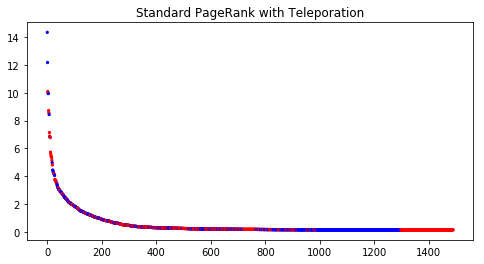

In [13]:
ranks = compute_page_rank(500)
sorted_ranks = sorted(ranks.items(), key = lambda kv: kv[1], reverse=True)
color_map = ['blue' if G.nodes[node]['party'] == 0 else 'red' for node, _ in sorted_ranks]
x, y = zip(*sorted_ranks) # unpack a list of pairs into two tuples
plt.figure(figsize=(8,4))
plt.scatter(range(len(y)), y, s=5, color=color_map)
plt.title("Standard PageRank with Teleporation")
plt.show()